In [2]:
import tensorflow_datasets as tfds
import tensorflow_text as tf_text
from datetime import datetime
#!pip install tensorflow_datasets
#!pip install tensorflow-text
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.7.0


 # Construir pipelines en TensorFlow 

## La API tf.data.Dataset admite la escritura  descriptivas y pipelines eficientes. El uso del conjunto de datos sigue:

* Creacion de un conjunto de datos original a partir de sus datos de entrada.
* Aplicar transformaciones de conjuntos de datos para preprocesar los datos.
* Iterar sobre el conjunto de datos y procesar los elementos.
La iteración ocurre tipo streaming por lo que no es necesario que el conjunto de datos completo quepa en la memoria.

para construir un conjunto de datos a partir de datos en la memoria, puede usar:
* tf.data.Dataset.from_tensors()
* tf.data.Dataset.from_tensor_slices()
* tf.data.TFRecordDataset() 


### Lista de python

In [216]:
array_examp =np.array(range(70)).reshape(7,10)
lista_examp = array_examp.tolist()
print(array_examp.shape)

(7, 10)


In [218]:
dataset1 = tf.data.Dataset.from_tensor_slices(array_examp)
dataset2 = tf.data.Dataset.from_tensors(array_examp)
dataset_lista_1 = tf.data.Dataset.from_tensor_slices(lista_examp)
dataset_lista_2 = tf.data.Dataset.from_tensors(lista_examp)

In [219]:
print(dataset1.element_spec)
print(dataset2.element_spec)
print(dataset_lista_1.element_spec)
print(dataset_lista_2.element_spec)

TensorSpec(shape=(10,), dtype=tf.int64, name=None)
TensorSpec(shape=(7, 10), dtype=tf.int64, name=None)
TensorSpec(shape=(10,), dtype=tf.int32, name=None)
TensorSpec(shape=(7, 10), dtype=tf.int32, name=None)


In [220]:
tensor1 = tf.ones([10,2,2])
tensor2 = tf.ones([10,1])
tensor3 = tf.ones([9,2,2])

In [221]:
dataset3 = tf.data.Dataset.from_tensor_slices((tensor1, tensor2))

In [222]:
dataset4 = tf.data.Dataset.from_tensor_slices((tensor1, tensor3))

ValueError: Dimensions 10 and 9 are not compatible

In [223]:
dataset5 = tf.data.Dataset.from_tensors((tensor1, tensor2))
dataset6 = tf.data.Dataset.from_tensors((tensor1, tensor3))

In [224]:
print(dataset3.element_spec)
print(dataset5.element_spec)
print(dataset6.element_spec)

(TensorSpec(shape=(2, 2), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))
(TensorSpec(shape=(10, 2, 2), dtype=tf.float32, name=None), TensorSpec(shape=(10, 1), dtype=tf.float32, name=None))
(TensorSpec(shape=(10, 2, 2), dtype=tf.float32, name=None), TensorSpec(shape=(9, 2, 2), dtype=tf.float32, name=None))


In [225]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
print(dataset3.element_spec)
for a, b in dataset3:
      print('shapes: {a.shape}, {b.shape}'.format(a=a, b=b))


(TensorSpec(shape=(10,), dtype=tf.int64, name=None), TensorSpec(shape=(7, 10), dtype=tf.int64, name=None))
shapes: (10,), (7, 10)


### Iteracion

In [226]:
for elem in dataset1:
  print(elem.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]


### Enumerar

In [228]:
dataset_enu = dataset1.enumerate(start=5)
for element in dataset_enu.as_numpy_iterator():
  print(element)

(5, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
(6, array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
(7, array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))
(8, array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]))
(9, array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))
(10, array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]))
(11, array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]))


### Barajar

In [172]:
dataset_shu = dataset1.shuffle(len(dataset1), reshuffle_each_iteration=True)
dataset_shu=dataset_shu.repeat(count=4) ## si count =-1 => se repite indefinidamente 
for element in dataset_shu.as_numpy_iterator():
  print(element)

NameError: name 'dataset1' is not defined

### Batch

In [233]:
dataset_range = tf.data.Dataset.range(20) #[0,1,2,...19]
dataset_range = dataset_range.batch(3)
dataset_range = dataset_range.enumerate(start=0)
for element in dataset_range.as_numpy_iterator():
  print(element)

(0, array([0, 1, 2]))
(1, array([3, 4, 5]))
(2, array([6, 7, 8]))
(3, array([ 9, 10, 11]))
(4, array([12, 13, 14]))
(5, array([15, 16, 17]))
(6, array([18, 19]))


In [234]:
dataset_range = tf.data.Dataset.range(20) #[0,1,2,...19]
dataset_range = dataset_range.batch(3,drop_remainder=True)
dataset_range = dataset_range.enumerate(start=0)
for element in dataset_range.as_numpy_iterator():
  print(element)

(0, array([0, 1, 2]))
(1, array([3, 4, 5]))
(2, array([6, 7, 8]))
(3, array([ 9, 10, 11]))
(4, array([12, 13, 14]))
(5, array([15, 16, 17]))


In [235]:
for element in dataset_range.take(2):   ##Take()
  print(element[0].numpy(),element[1].numpy())

0 [0 1 2]
1 [3 4 5]


In [237]:
dataset1_range = dataset1.batch(3)
dataset1_range = dataset1_range.enumerate(start=0)
for element in dataset1_range.as_numpy_iterator():
  print(element)

(0, array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]))
(1, array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]))
(2, array([[60, 61, 62, 63, 64, 65, 66, 67, 68, 69]]))


In [238]:
dataset1_range = dataset1.batch(1)
dataset1_range = dataset1_range.enumerate(start=0)
for element in dataset1_range.as_numpy_iterator():
  print(element)

(0, array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))
(1, array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]))
(2, array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]))
(3, array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]))
(4, array([[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]))
(5, array([[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]))
(6, array([[60, 61, 62, 63, 64, 65, 66, 67, 68, 69]]))


### funcion map 

In [239]:
def dense_1_step(batch):
  return batch[:-1], batch[1:]

In [240]:
predict_dense_1_step =dataset1.map(dense_1_step)

for features, label in predict_dense_1_step:
  print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7 8]  =>  [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18]  =>  [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28]  =>  [21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38]  =>  [31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48]  =>  [41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58]  =>  [51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68]  =>  [61 62 63 64 65 66 67 68 69]


### funcion flat_map 

In [243]:
dataset = dataset1.flat_map(
    lambda x: tf.data.Dataset.from_tensor_slices(x))
list(dataset.as_numpy_iterator())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69]

### Dataset como texto .txt

In [244]:
with open('sonnets.txt', 'r', encoding='utf-8') as file:
    text_string = file.read().replace('\n', ' ')
text_string[:500]

"FROM fairest creatures we desire increase, That thereby beauty's rose might never die, But as the riper should by time decease, His tender heir might bear his memory: But thou, contracted to thine own bright eyes, Feed'st thy light'st flame with self-substantial fuel, Making a famine where abundance lies, Thyself thy foe, to thy sweet self too cruel. Thou that art now the world's fresh ornament And only herald to the gaudy spring, Within thine own bud buriest thy content And, tender churl, makes"

In [245]:
dataset_text = tf.data.TextLineDataset(["sonnets.txt", "sonnets(1).txt"])

In [246]:
dataset_text_set = tf.data.Dataset.list_files("./*.txt")

### Dataset en formato .csv

In [247]:
pandas_dataframe = pd.read_csv('Sunspots.csv')
pandas_dataframe.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [248]:
dataframe_dict = dict(pandas_dataframe)
print(dataframe_dict.keys())
print("tamano del dataframe: ",len(pandas_dataframe))

dict_keys(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'])
tamano del dataframe:  3235


In [249]:
pandas_dataset = tf.data.Dataset.from_tensor_slices(dataframe_dict)
pandas_dataset.element_spec
print(pandas_dataset.cardinality().numpy())

3235


In [250]:
csv_dataset = tf.data.experimental.make_csv_dataset('Sunspots.csv',
                                                    batch_size=1,
                                                    label_name='Monthly Mean Total Sunspot Number')
csv_dataset.element_spec

(OrderedDict([('', TensorSpec(shape=(1,), dtype=tf.int32, name=None)),
              ('Date', TensorSpec(shape=(1,), dtype=tf.string, name=None))]),
 TensorSpec(shape=(1,), dtype=tf.float32, name=None))

In [251]:
def extract_time(x,label):
    date_ = datetime.fromisoformat(x.numpy()[0].decode("utf-8"))
    year =date_.year
    month =date_.month
    day =date_.day
    return day, year, month, label


data_map=csv_dataset.map(lambda x,z: tf.py_function(extract_time, [x['Date'],z], [tf.int32,tf.int32,tf.int32,tf.float32])).take(5)

In [252]:
for df in data_map:
    day, year, month,label = df
    print(day.numpy(),year.numpy(),month.numpy(),label.numpy())


30 1779 11 [190.]
30 1848 6 [214.9]
30 1986 6 [0.6]
31 2012 10 [76.5]
31 2002 1 [184.6]


### Descargar datos predefinidos de https://www.tensorflow.org/datasets/catalog/overview

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    name = 'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

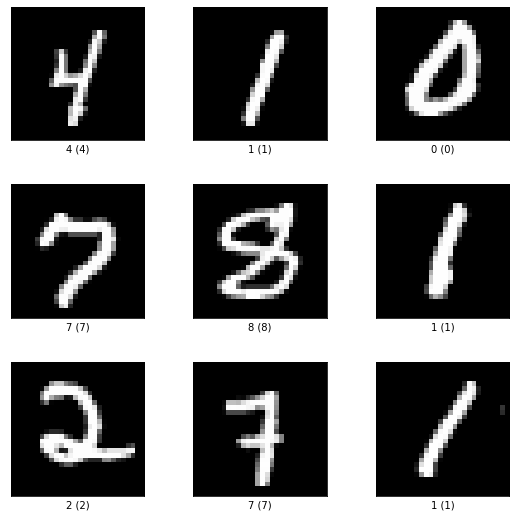

In [4]:
fig = tfds.show_examples(ds_train, ds_info)

In [58]:
def normalize_img(image,label ):
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label,depth=10)


def data_load(data_ds,augmented=normalize_img,shuffle_=True ,batch_=5):
    data_ds = data_ds.map(
        augmented, num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

In [59]:
data_train = data_load(ds_train)
data_test = data_load(ds_test,shuffle_=False)

(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]], shape=(5, 10), dtype=float32)
(5, 28, 28, 1) tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


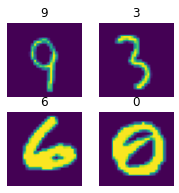

In [60]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in data_train.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(ds[0].numpy())
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

### Data Augmentation: https://www.tensorflow.org/guide/keras/preprocessing_layers

### Metodo 1. sobre tf.data

In [62]:
def augment_data(images, labels):
    images = tf.image.random_flip_left_right(images)
    images = tf.image.random_flip_up_down(images)
    images = tf.image.rot90(images)
    return images, labels

In [63]:
data_train = data_load(ds_train,augmented=augment_data)
data_test = data_load(ds_test,augmented=augment_data,shuffle_=False)

(5, 28, 28, 1) tf.Tensor([3 7 9 7 4], shape=(5,), dtype=int64)
(5, 28, 28, 1) tf.Tensor([1 5 0 2 2], shape=(5,), dtype=int64)
(5, 28, 28, 1) tf.Tensor([8 4 9 0 9], shape=(5,), dtype=int64)
(5, 28, 28, 1) tf.Tensor([2 8 9 6 7], shape=(5,), dtype=int64)


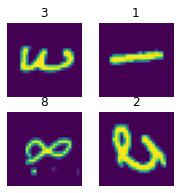

In [65]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in data_train.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(ds[0].numpy())
    plt.title('{}'.format(lb[0].numpy()))
    plt.axis("off")
    i+=1

### Metodo 2. Usando Sequence en tf.data

In [245]:
from tensorflow.keras import layers, Sequential
trainAug = Sequential([
        layers.Rescaling(scale=1.0 / 255),
        layers.RandomContrast(0.5),
        layers.RandomZoom(.5, .2),
        layers.RandomFlip("horizontal"),
        layers.RandomCrop(20,20)
    ],name='augmentation_in_model')
layer_onehot = layers.CategoryEncoding(
          num_tokens=10, output_mode="one_hot")

In [246]:
def data_load_sequential(data_ds,shuffle_train=True ,batch_=5):
    data_ds = data_ds.map(
        lambda x, y: (trainAug(x,shuffle_train),layer_onehot(y)), num_parallel_calls=tf.data.AUTOTUNE)
    data_ds = data_ds.cache()
    if shuffle_train:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

data_train = data_load_sequential(ds_train)
data_test = data_load_sequential(ds_test,shuffle_train=False)

(5, 20, 20, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
(5, 20, 20, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]], shape=(5, 10), dtype=float32)
(5, 20, 20, 1) tf.Tensor(
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)
(5, 20, 20, 1) tf.Tensor(
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)


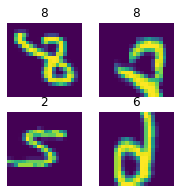

In [247]:
plt.figure(figsize=(3, 3))
i=0
for ds,lb in data_train.take(4):
    print(ds.shape,lb)
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(ds[0].numpy())
    shaped=ds[0].numpy().shape
    index = tf.argmax(lb, axis=1)
    plt.title('{}'.format(index[0].numpy()))
    plt.axis("off")
    i+=1

### Metodo 3. Usando Sequence dentro del modelo

In [244]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=shaped))
model.add(trainAug)
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 augmentation_in_model (Sequ  (None, 20, 20, 1)        0         
 ential)                                                         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 16)        160       
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 10)                64010     
                                                                 
Total params: 64,170
Trainable params: 64,170
Non-trainable params: 0
_________________________________________________________________


### Analisis en Texto

In [269]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [270]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(1)))
print(train_examples_batch,train_labels_batch)

tf.Tensor([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."], shape=(1,), dtype=string) tf.Tensor([0], shape=(1,), dtype=int64)


In [271]:
def tf_lower_and_split_punct(text):
  
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  text = tf.strings.strip(text)
  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

In [272]:
def data_load_txt(data_ds,shuffle_=True ,batch_=12):
    data_ds = data_ds.cache()
    if shuffle_:
        data_ds = data_ds.shuffle(len(data_ds))
    data_ds = data_ds.batch(batch_)
    data_ds = data_ds.prefetch(tf.data.AUTOTUNE)
    return data_ds

BATCH=32
data_train = data_load_txt(train_data,batch_=BATCH)
data_test = data_load_txt(test_data,shuffle_=False,batch_=BATCH)
data_val = data_load_txt(validation_data,shuffle_=False,batch_=BATCH)

In [273]:
max_vocab_size = 10000

input_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

In [274]:
reviews_only_ds = data_train.map(lambda a, b: a) 
input_text_processor.adapt(reviews_only_ds)

In [275]:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', 'the', '.', ',', 'and', 'a', 'of', 'to', 'is']

In [276]:
for idx in data_train.take(1):
    example_tokens = input_text_processor(idx[0])
    print(idx[1],example_tokens)

tf.Tensor([1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1], shape=(32,), dtype=int64) tf.Tensor(
[[  34 1016    6 ...    0    0    0]
 [  34 9925 6599 ...    0    0    0]
 [  34   13   16 ...    0    0    0]
 ...
 [  34   13   28 ...    0    0    0]
 [  34    2   68 ...    0    0    0]
 [  34   10   10 ...    0    0    0]], shape=(32, 794), dtype=int64)


In [277]:
input_vocab = np.array(input_text_processor.get_vocabulary())
tokens = input_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] following a sitcom plot is so [UNK] easy that having her character simultaneously operate both within and without the context the rest of the cast inhabit is the kind of [UNK] that sitcoms could really use . the supporting characters ground the show in a sitcom reality which provides a [UNK] [UNK] to [UNK] erratic persona which , beyond general [UNK] , has no specific recurring traits for [UNK] expectations to be based on , making her less a character than a canvas to be [UNK] in every episode if not scene . [UNK] ability to see everything from an outside perspective [UNK] her to parody aspects of social behaviour that are subtle enough to usually go [UNK] . every time she speaks its like a [UNK] second skit . she [UNK] a lot , [UNK] the countless things a smile or change in vocal pitch can [UNK] , but never sticks with one idea long enough for you to get comfortable and form expectations that will be satisfied . this may be the most creative , original and experimental tv pro

Text(0.5, 1.0, 'Mask')

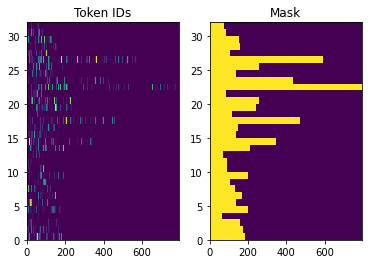

In [278]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens)
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens != 0)
plt.title('Mask')

In [279]:
from tensorflow.keras.layers import Embedding,Dense
from tensorflow.keras import Sequential

vocab_size = 10000
embedding_dim=16

model = Sequential([
input_text_processor,
  Embedding(input_dim = vocab_size, 
            output_dim = embedding_dim, 
            name="embedding"),
   Dense(1)])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_12 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 dense_4 (Dense)             (None, None, 1)           17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________
